<h1>Project Objective

# Sales Data Visualization
**Objective:** Use Python (Pandas, Matplotlib, Seaborn) to analyze and visualize sales data.  
**Expected Outcome:**  
- Bar: Sales by product category  
- Line: Monthly sales trend  
- Pie: Revenue distribution by region  
- Histogram: Order value distribution


<h3>Imports Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


<h3>Load Dataset

In [20]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1', parse_dates=['Order Date'])
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<h3>Data Info & Cleaning

In [21]:
df.info()
print("\nMissing values:\n", df.isnull().sum())
df['Order Date'] = pd.to_datetime(df['Order Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

<h3>Add Month Column

### Bar Chart - Sales by Product Category
- Shows which product categories generate the highest total sales.


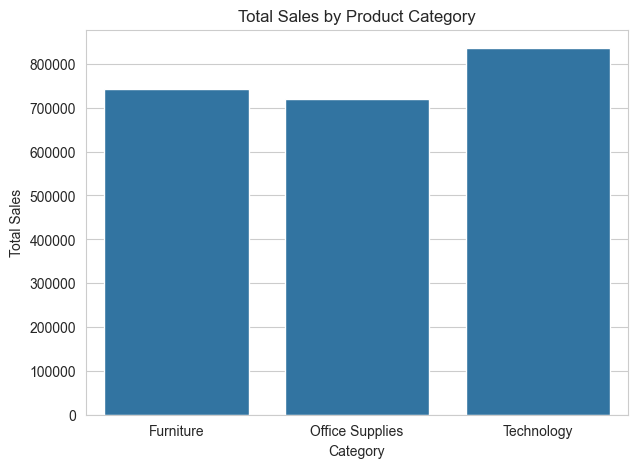

In [22]:
plt.figure(figsize=(7,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()


### Line Chart - Monthly Sales Trend
- Shows how sales trend over months.


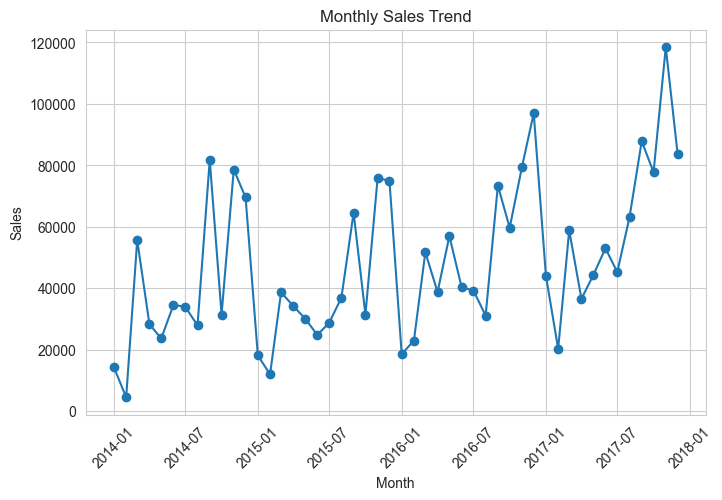

In [23]:
monthly_sales = df.copy()
monthly_sales['Month'] = monthly_sales['Order Date'].dt.to_period('M').dt.to_timestamp()
monthly_sales = monthly_sales.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Pie Chart - Revenue by Region
- Shows revenue contribution percentage for each region.


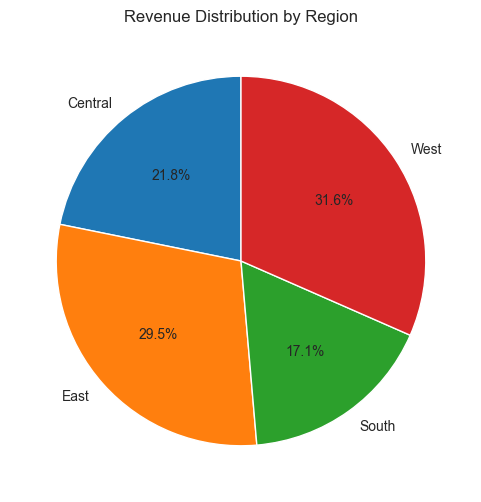

In [24]:
region_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(6,6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Region')
plt.show()


### Histogram - Order Value Distribution
- Shows how order values are distributed.


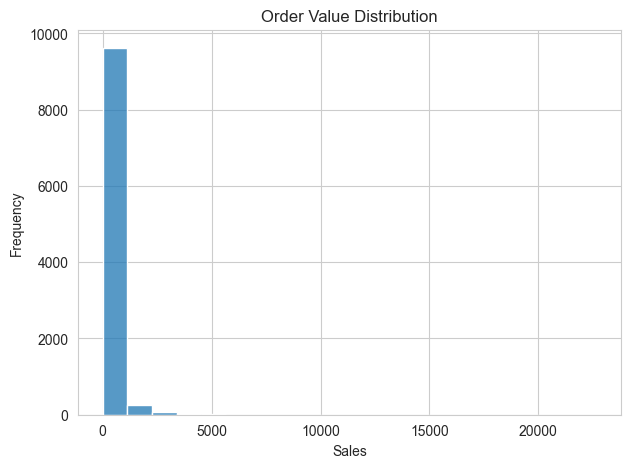

In [25]:
plt.figure(figsize=(7,5))
sns.histplot(df['Sales'], bins=20, kde=False)
plt.title('Order Value Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


## Insights
- Technology category generates the highest sales.
- Sales show monthly variation with peaks in some months.
- West region has significant revenue share.
- Most order values are clustered at lower sales amounts.

**Conclusion:**  
This analysis helps identify top-performing categories, regional contributions, and order value patterns.
